# Can you find a better way to segment your customers?

## 📖 Background
You work for a medical device manufacturer in Switzerland. Your company manufactures orthopedic devices and sells them worldwide. The company sells directly to individual doctors who use them on rehabilitation and physical therapy patients.

Historically, the sales and customer support departments have grouped doctors by geography. However, the region is not a good predictor of the number of purchases a doctor will make or their support needs.

Your team wants to use a data-centric approach to segmenting doctors to improve marketing, customer service, and product planning. 

## 💾 The data

The company stores the information you need in the following four tables. Some of the fields are anonymized to comply with privacy regulations.

#### Doctors contains information on doctors. Each row represents one doctor.
- "DoctorID" - is a unique identifier for each doctor.
- "Region" - the current geographical region of the doctor.
- "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
- "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
- "Incidence rate"  and "R rate" - relate to the amount of re-work each doctor generates.
- "Satisfaction" - measures doctors' satisfaction with the company.
- "Experience" - relates to the doctor's experience with the company.
- "Purchases" - purchases over the last year.

#### Orders contains details on orders. Each row represents one order; a doctor can place multiple orders.
- "DoctorID" - doctor id (matches the other tables).
- "OrderID" - order identifier.
- "OrderNum" - order number.
- "Conditions A through J" - map the different settings of the devices in each order. Each order goes to an individual patient.

#### Complaints collects information on doctor complaints.
- "DoctorID" - doctor id (matches the other tables).
- "Complaint Type" - the company's classification of the complaints.
- "Qty" - number of complaints per complaint type per doctor.

#### Instructions has information on whether the doctor includes special instructions on their orders.
- "DoctorID" - doctor id (matches the other tables).
- "Instructions" - 'Yes' when the doctor includes special instructions, 'No' when they do not.

## 💪 Competition challenge

Create a report that covers the following:
1. How many doctors are there in each region? What is the average number of purchases per region?
2. Can you find a relationship between purchases and complaints?
3. Define new doctor segments that help the company improve marketing efforts and customer service.
4. Identify which features impact the new segmentation strategy the most.
5. Your team will need to explain the new segments to the rest of the company. Describe which characteristics distinguish the newly defined segments.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
doctors = pd.read_csv('data/doctors.csv')
orders = pd.read_csv('data/orders.csv')
complaints = pd.read_csv('data/complaints.csv')
instructions = pd.read_csv('data/instructions.csv')

print(f"Total number of doctors is {doctors.shape[0]}")
print(f"Total number of orders is {orders.shape[0]}")
print(f"Total number of complaints is {complaints.shape[0]}")
print(f"Total number of instructions is {instructions.shape[0]}")

doctors.columns = doctors.columns.str.replace(' ','_')
orders.columns = orders.columns.str.replace(' ','_')
complaints.columns = complaints.columns.str.replace(' ','_')

Total number of doctors is 437
Total number of orders is 257
Total number of complaints is 435
Total number of instructions is 77


# Q1.1 How many doctors are there in each region?

In [3]:
df = doctors.groupby('Region')['DoctorID'].count().reset_index().sort_values(by="DoctorID", ascending = False)
df.columns = ['Region', 'Count']
df.head(10)

,Region,Count
6,1 13,34
22,1 9,32
9,1 14,32
12,1 19,31
2,1 11,23
3,1 12,23
19,1 8,21
0,1 10,15
10,1 14 T3,15
38,2 7 19,14


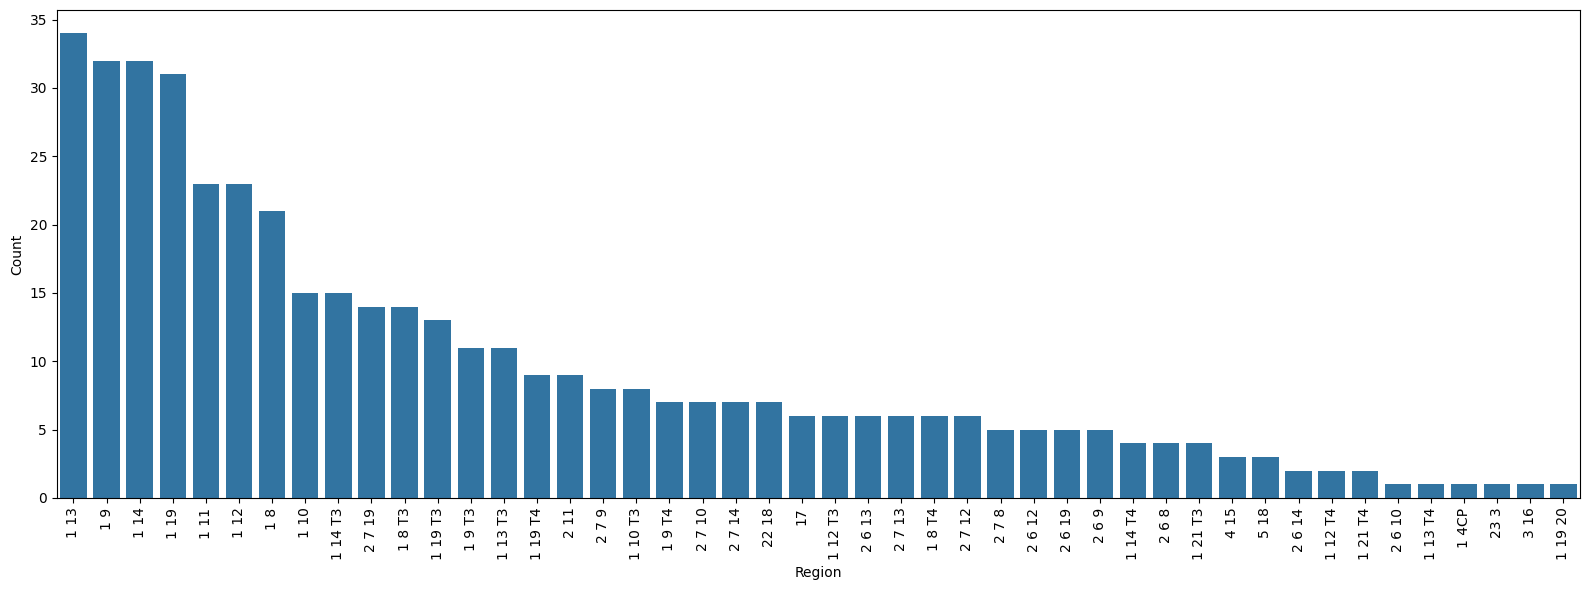

In [4]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df, x = "Region", y = "Count")
plt.xticks(rotation = 90)
plt.tight_layout()

In [5]:
df = doctors.groupby(['Region','Category'])['DoctorID'].count().reset_index()
df.columns = ['Region', 'Category', 'Count']
df = pd.pivot(data = df, index='Region', columns='Category', values='Count').sort_values(by = "Specialist", ascending = False).fillna(0)
df = df.reset_index()
df = df.set_index("Region")
df['Total'] = df['General Practitioner'] + df['Specialist']
df = df.sort_values(by = "Total", ascending = False)
df.head()

Category,General Practitioner,Specialist,Total
Region,,,
1 13,6.0,28.0,34.0
1 9,3.0,29.0,32.0
1 14,4.0,28.0,32.0
1 19,3.0,28.0,31.0
1 12,2.0,21.0,23.0


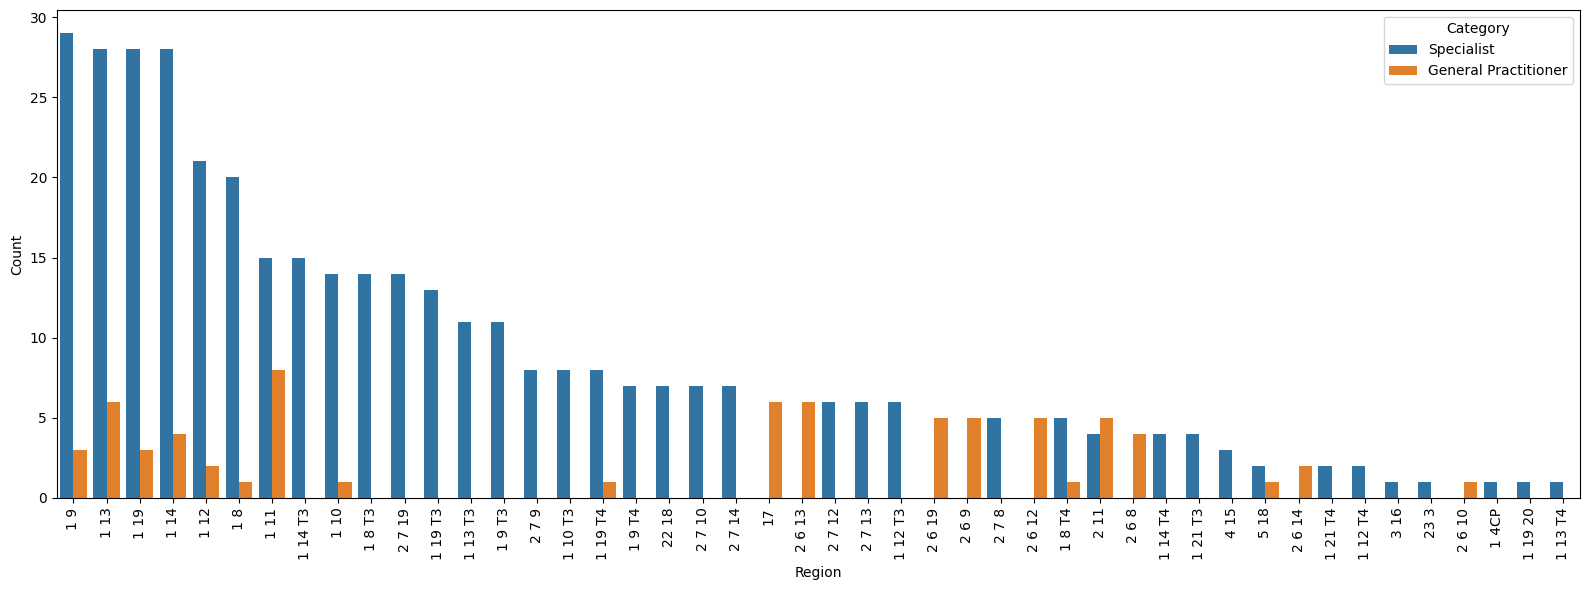

In [6]:
df = doctors.groupby(['Region','Category'])['DoctorID'].count().reset_index()
df.columns = ['Region', 'Category', 'Count']
df = df.sort_values(by = "Count", ascending = False)
plt.figure(figsize = (16, 6))
sns.barplot(data = df, x = "Region", y = "Count", hue = "Category")
plt.xticks(rotation = 90)
plt.tight_layout()

# Q1.2 What is the average number of purchases per region?

In [7]:
keep_cols = ['Purchases','Region']
df = doctors[keep_cols]
df = df.groupby('Region').agg({'Purchases':['mean','count','sum']}).reset_index()
df.columns = list(map("_".join, df.columns))
df.columns = ['Region', 'Average', 'Count', 'Sum']
df.sort_values(by = "Average", ascending = False).head(10)

,Region,Average,Count,Sum
13,1 19 20,129.000000,1,129.0
8,1 13 T4,30.000000,1,30.0
15,1 19 T4,25.333333,9,228.0
24,1 9 T4,23.428571,7,164.0
44,4 15,23.333333,3,70.0
5,1 12 T4,22.500000,2,45.0
11,1 14 T4,19.500000,4,78.0
21,1 8 T4,18.500000,6,111.0
0,1 10,15.000000,15,225.0
3,1 12,14.913043,23,343.0


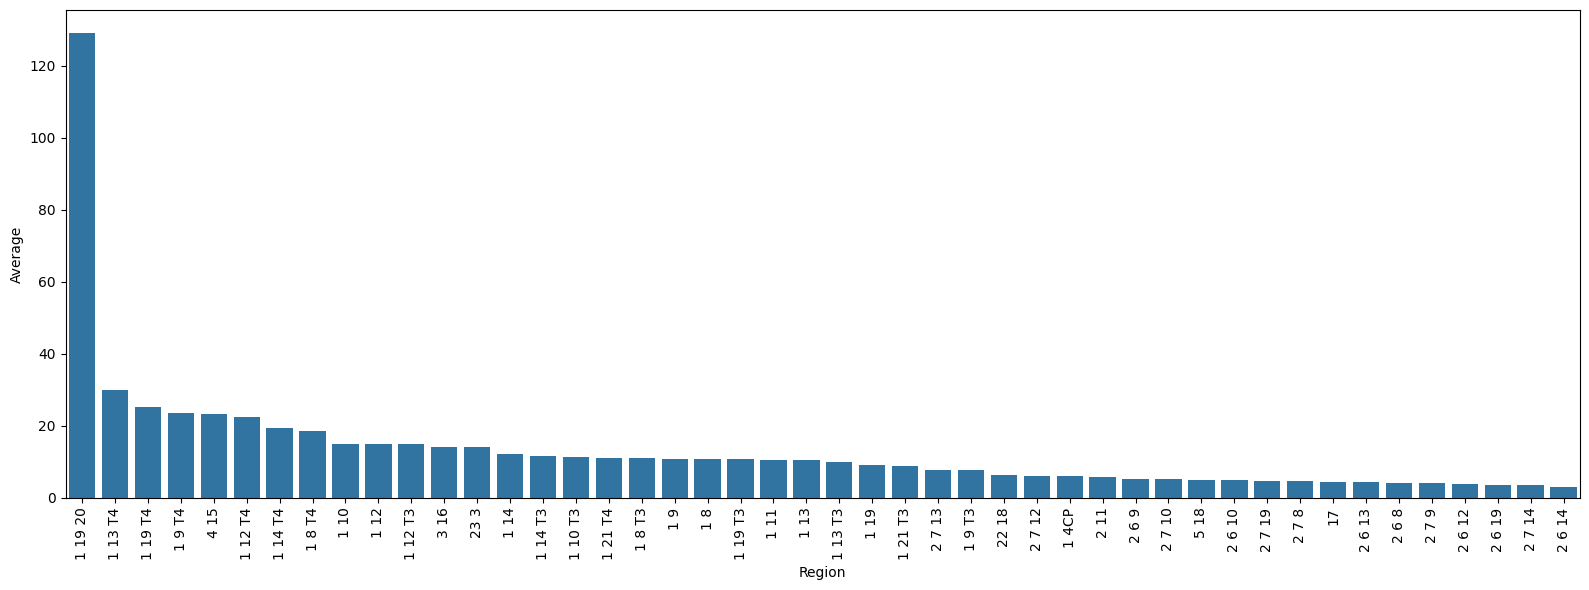

In [8]:
plt.figure(figsize = (16, 6))
df = df.sort_values(by = "Average", ascending = False)
sns.barplot(data = df, x = 'Region', y = 'Average')
plt.xticks(rotation = 90)
plt.tight_layout()

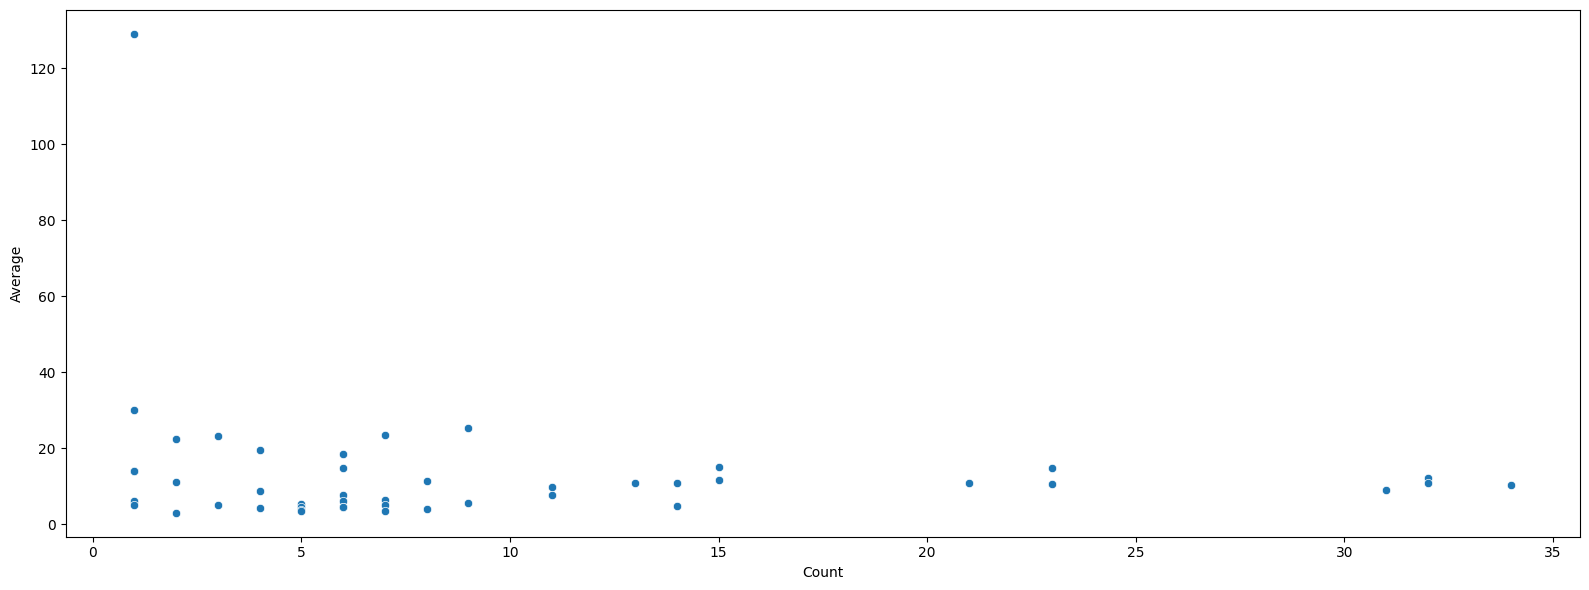

In [9]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df, x = 'Count', y = 'Average')
plt.tight_layout()

In [10]:
threshold = 5
df2 = df[df['Count'] > threshold].sort_values(by = "Average", ascending = False)
df2.head(10)

,Region,Average,Count,Sum
15,1 19 T4,25.333333,9,228.0
24,1 9 T4,23.428571,7,164.0
21,1 8 T4,18.500000,6,111.0
0,1 10,15.000000,15,225.0
3,1 12,14.913043,23,343.0
4,1 12 T3,14.833333,6,89.0
9,1 14,12.156250,32,389.0
10,1 14 T3,11.666667,15,175.0
1,1 10 T3,11.375000,8,91.0
20,1 8 T3,10.928571,14,153.0


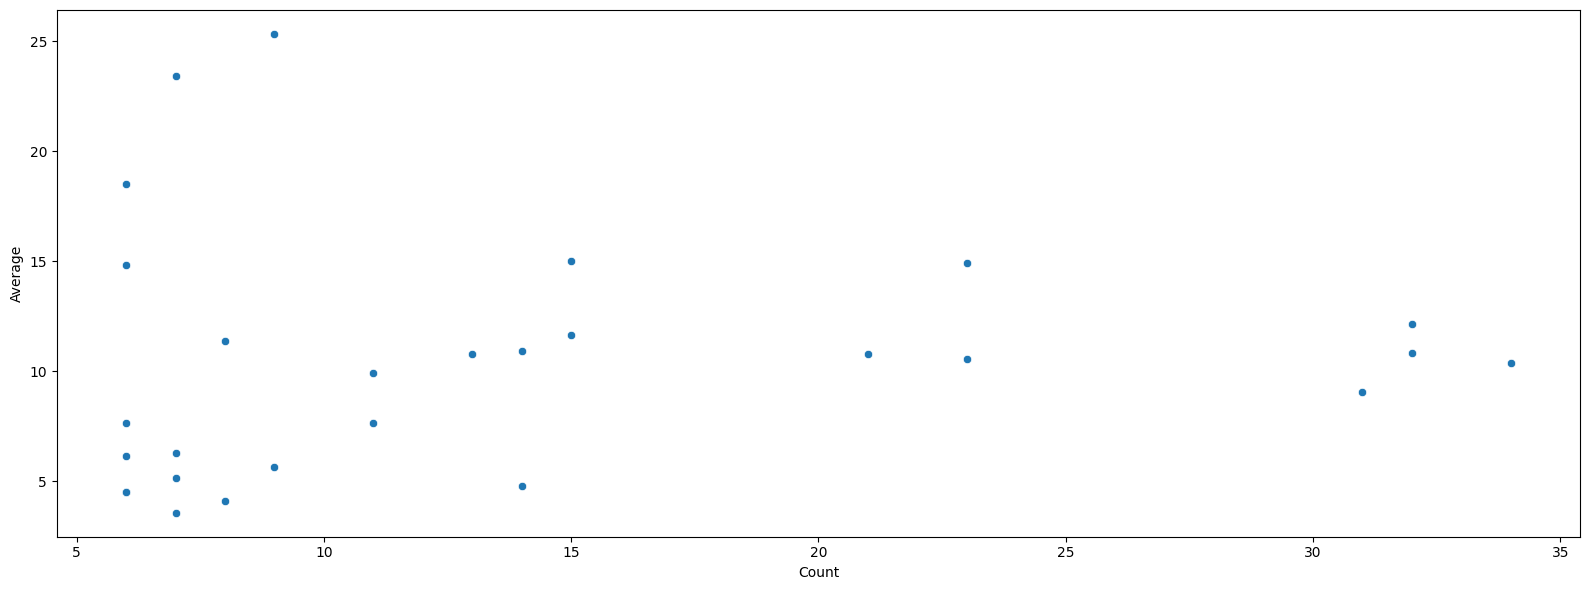

In [11]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df2, x = 'Count', y = 'Average')
plt.tight_layout()

# Q2 Can you find a relationship between Purchases and Complaints?

In [12]:
df = pd.merge(doctors, complaints, on = "DoctorID", how = 'inner')
df.head()

,DoctorID,Region,Category,Rank,Incidence_rate,R_rate,Satisfaction,Experience,Purchases,Complaint_Type,Qty
0,FCBDC,2 7 19,Specialist,Silver Plus,14.0,0.07,--,0.07,14.0,Unknown,1
1,IFDIB,1 19 T3,Specialist,Titanium,13.0,1.29,37.50,0.14,14.0,Correct,1
2,FDHGC,1 14,Specialist,Titanium,12.0,0.85,--,0.62,13.0,Correct,4
3,FDHGC,1 14,Specialist,Titanium,12.0,0.85,--,0.62,13.0,Incorrect,4
4,FDHGC,1 14,Specialist,Titanium,12.0,0.85,--,0.62,13.0,Unknown,1


In [13]:
# Create a lookup table of all doctor complaints

doctor_complaints = df.groupby('DoctorID')['Qty'].sum().reset_index()
doctor_complaints.columns = ['DoctorID','Complaints']
#doctor_complaints.sort_values(by="Complaint", ascending = False)

In [14]:
# Append lookup table to doctors dataframe

doctors2 = pd.merge(doctors, doctor_complaints, on = "DoctorID", how = "left")
doctors2['Complaints'].fillna(0, inplace=True)
doctors2['Complaints_to_Purchase'] = doctors2['Complaints'] / doctors2['Purchases']
#doctors2.sort_values('Complaints_to_Purchase', ascending = False)

In [15]:
# What is the correlation between purchase count and complaint count?
doctors2[['Purchases','Complaints']].corr().iloc[0, 1]

0.15669083481026166

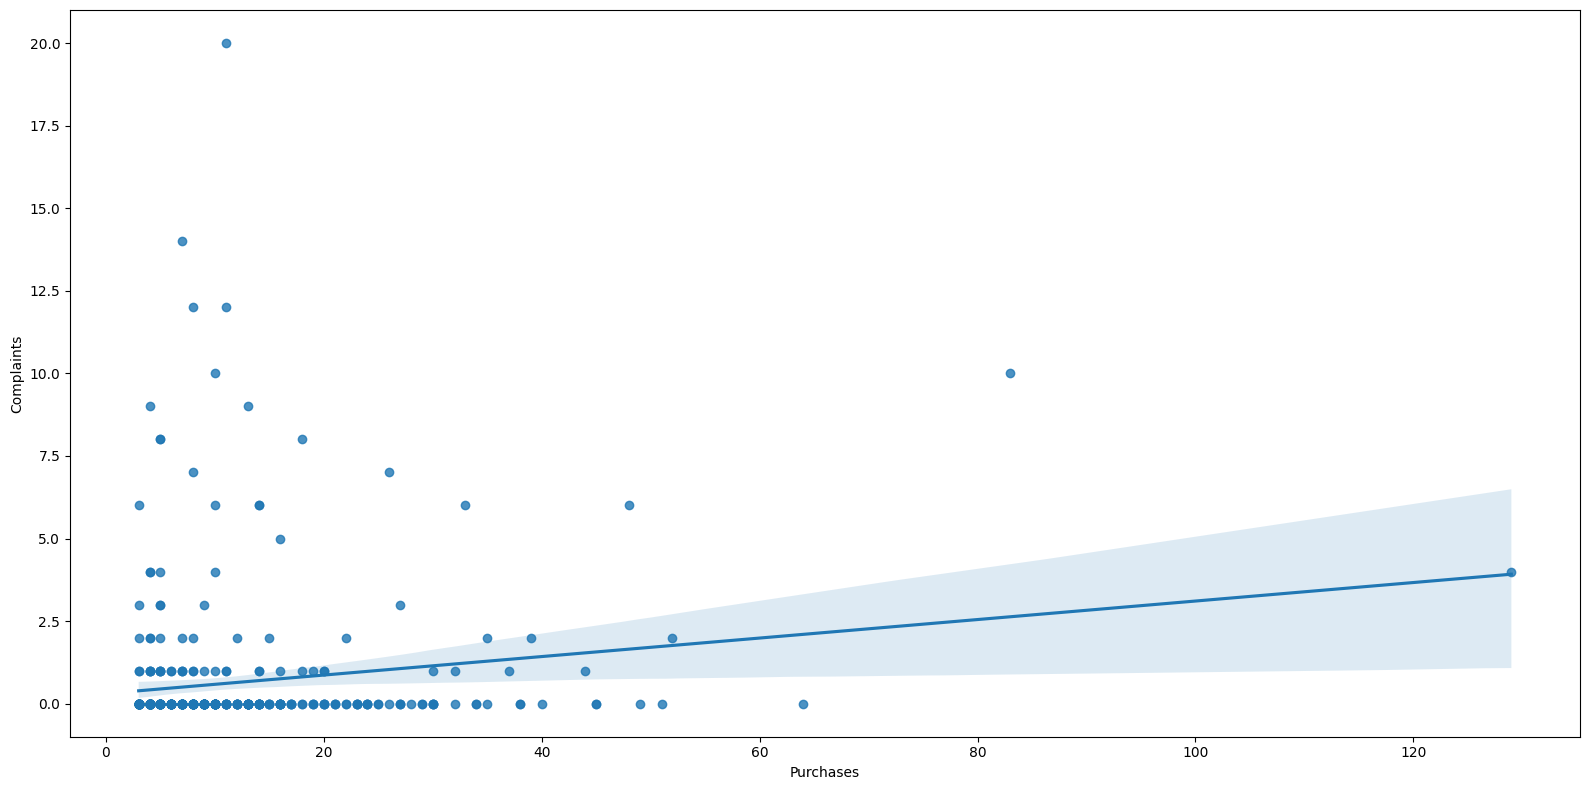

In [16]:
plt.figure(figsize = (16, 8))
sns.regplot(data = doctors2, x = 'Purchases', y = 'Complaints')
plt.tight_layout()

In [17]:
# check for correlation within doctors dataframe with other numeric features

numeric_cols = doctors2.select_dtypes(float).columns

doctors_with_complaints = doctors2[doctors2['Complaints'] > 0]
docs_corr = doctors_with_complaints[numeric_cols].corr()['Complaints'][:-1].sort_values(ascending = False).reset_index()
docs_corr.columns = ['Category', 'Correlation']
docs_corr = docs_corr.iloc[1:, :]

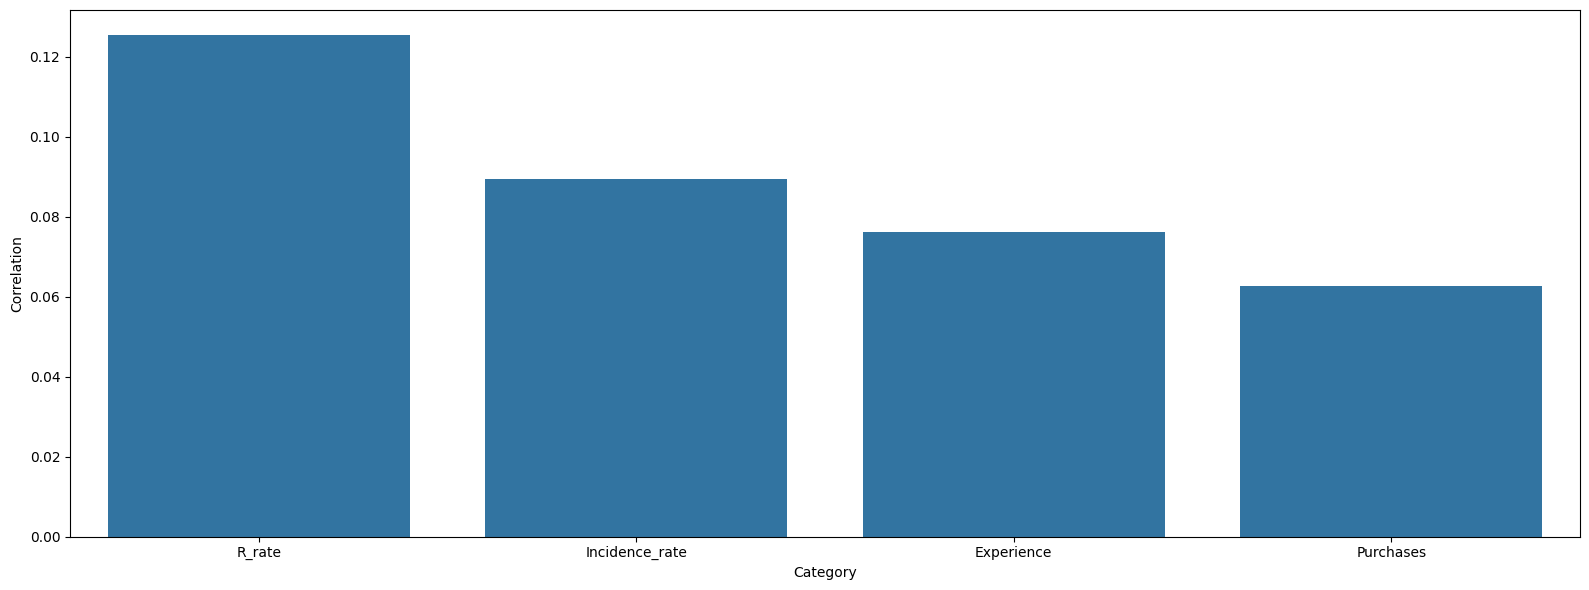

In [18]:
plt.figure(figsize = (16, 6))
sns.barplot(docs_corr, x= 'Category', y = 'Correlation')
plt.tight_layout()

In [19]:
# Number of doctors who placed a complaint
df['DoctorID'].nunique() / doctors['DoctorID'].nunique()

0.16933638443935928

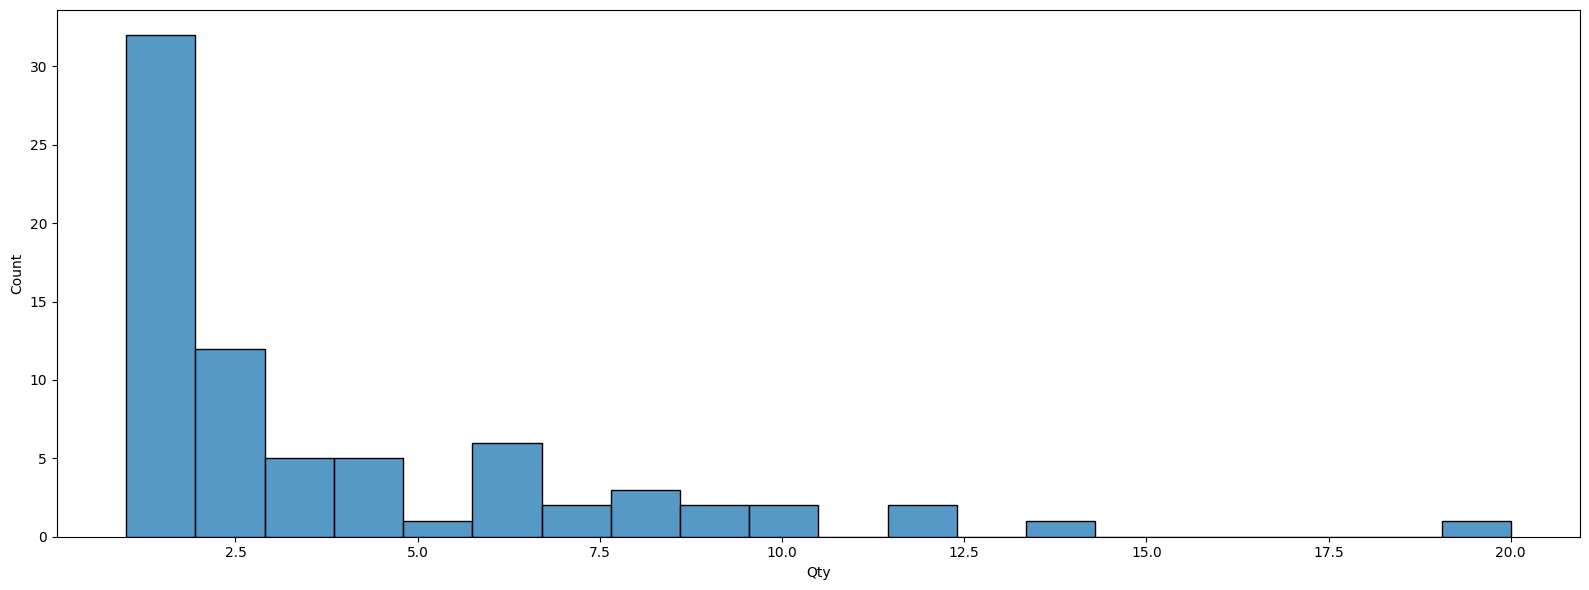

In [20]:
# What is the distribution of complaint count?

plt.figure(figsize = (16, 6))
df1 = df.groupby('DoctorID')['Qty'].sum().reset_index().sort_values(by = "Qty", ascending = False)
sns.histplot(df1['Qty'], bins = 20)
plt.tight_layout()

In [21]:
df2 = df1['Qty'].value_counts(normalize=True).reset_index()
df2.columns = ['Complaints', 'Pct']
df2

,Complaints,Pct
0,1,0.432432
1,2,0.162162
2,6,0.081081
3,4,0.067568
4,3,0.067568
5,8,0.040541
6,12,0.027027
7,10,0.027027
8,9,0.027027
9,7,0.027027


In [22]:
df1 = df.groupby("Complaint_Type")['Qty'].sum().reset_index().sort_values(by = 'Qty', ascending = False)
df1['Pct'] = df1['Qty'] / df1['Qty'].sum()
df1

,Complaint_Type,Qty,Pct
0,Correct,147,0.552632
1,Incorrect,66,0.248120
4,Unknown,47,0.176692
3,Specific,5,0.018797
2,R&R,1,0.003759


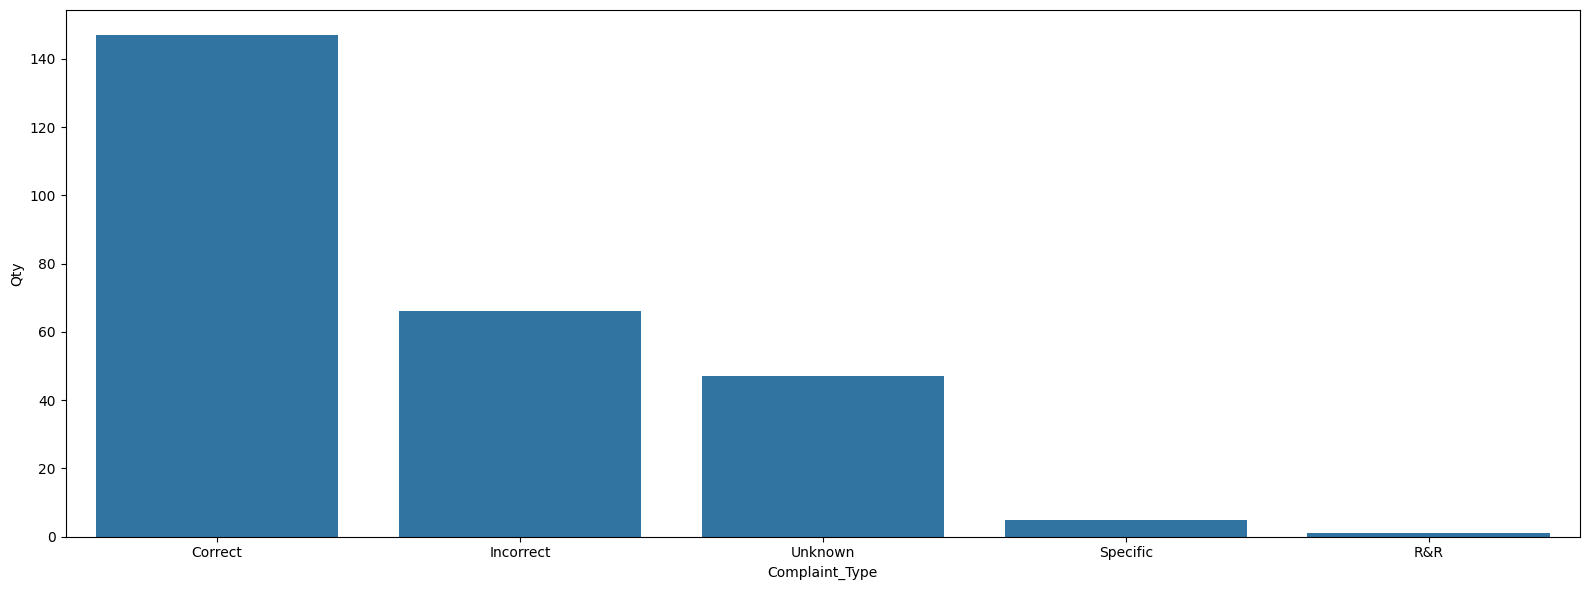

In [23]:
plt.figure(figsize = (16, 6))
sns.barplot(df1, x= 'Complaint_Type', y = 'Qty')
plt.tight_layout()

In [24]:
df1 = df.groupby("Category")['Qty'].sum().reset_index().sort_values(by = 'Qty', ascending = False)
df1['Pct'] = df1['Qty'] / df1['Qty'].sum()
df1

,Category,Qty,Pct
1,Specialist,257,0.966165
0,General Practitioner,9,0.033835


In [25]:
# Type of doctors who make complaints
doctors_with_complaints = list(complaints['DoctorID'].unique())
df1 = doctors[doctors['DoctorID'].isin(doctors_with_complaints)]
df1['Category'].value_counts(normalize = True)
df1

,DoctorID,Region,Category,Rank,Incidence_rate,R_rate,Satisfaction,Experience,Purchases
9,FCBDC,2 7 19,Specialist,Silver Plus,14.00,0.07,--,0.07,14.0
14,IFDIB,1 19 T3,Specialist,Titanium,13.00,1.29,37.50,0.14,14.0
16,FDHGC,1 14,Specialist,Titanium,12.00,0.85,--,0.62,13.0
19,AHIEIG,1 12,Specialist,Ambassador,11.33,1.00,--,0.30,37.0
25,AEFEAG,1 19 T3,Specialist,Platinum Plus,10.00,1.10,--,0.00,10.0
...,...,...,...,...,...,...,...,...,...
416,FCDBG,1 12,Specialist,Ambassador,2.33,1.05,87.10,1.00,20.0
421,AABDHC,1 13,Specialist,Titanium,2.33,2.30,31.82,0.60,10.0
425,IAEBD,1 19 20,Specialist,Ambassador,2.31,1.29,84.29,1.09,129.0
432,AIABDJ,1 10,Specialist,Ambassador,2.18,0.80,11.76,0.77,35.0


In [26]:
# Doctors with orders
doctors_with_orders = list(orders['DoctorID'].unique())
df1 = doctors2[doctors2['DoctorID'].isin(doctors_with_orders)]
df1['Complaints'].value_counts()

1.0     32
2.0     12
6.0      6
4.0      5
3.0      5
8.0      3
9.0      2
10.0     2
7.0      2
12.0     2
14.0     1
20.0     1
5.0      1
Name: Complaints, dtype: int64

In [27]:
mapping = df.groupby('Category')['Qty'].sum().to_dict()
mapping

df1 = df.groupby(['Category', 'Complaint_Type'])['Qty'].sum().reset_index()
df1 = df1.sort_values(by = ['Category', 'Qty'], ascending = False)
df1['Total'] = df1['Category'].map(mapping)
df1['Pct_of_Category'] = df1['Qty'] / df1['Total']
df1[['Category','Complaint_Type','Pct_of_Category']]

,Category,Complaint_Type,Pct_of_Category
3,Specialist,Correct,0.556420
4,Specialist,Incorrect,0.245136
7,Specialist,Unknown,0.182879
6,Specialist,Specific,0.011673
5,Specialist,R&R,0.003891
0,General Practitioner,Correct,0.444444
1,General Practitioner,Incorrect,0.333333
2,General Practitioner,Specific,0.222222


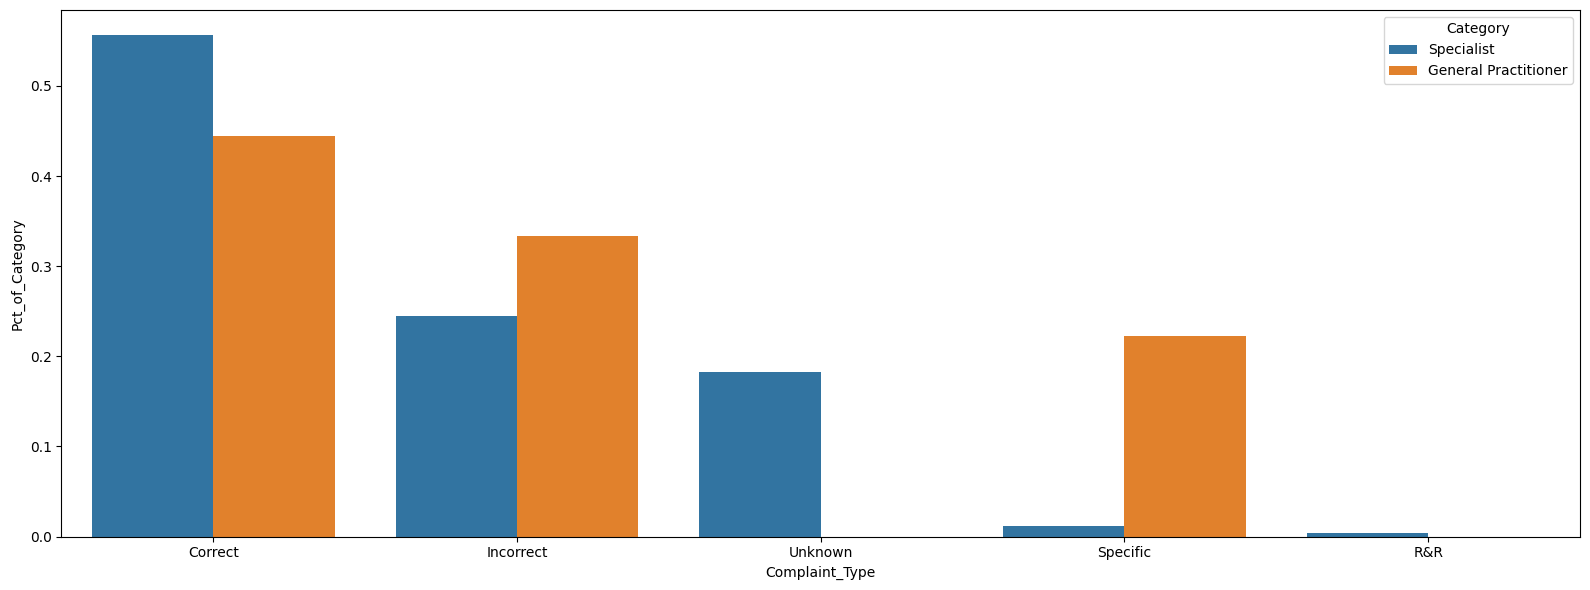

In [28]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df1, x = 'Complaint_Type', y = 'Pct_of_Category', hue = "Category")
plt.tight_layout()

# Q3. Define new doctor segments that help the company improve marketing efforts and customer service.

## Prepare data for modeling

In [51]:
# Fixing satisfaction column
doctors.loc[doctors.Satisfaction == '--', 'Satisfaction'] = np.nan
doctors.Satisfaction = doctors.Satisfaction.astype('float')

satisfaction_median = doctors['Satisfaction'].median()
doctors['Satisfaction'].fillna(satisfaction_median, inplace = True)

In [52]:
# Cleaning Rank Category

doctors['Rank'] = doctors['Rank'].apply(lambda x: 'Ambassador' if x == 'Ambassador'
                                     else 'Titanium' if x == 'Titanium' or x == 'Titanium Plus' 
                                     else 'Platinum'  if x == 'Platinum' or x == 'Platinum Plus' 
                                     else 'Gold' if x == 'Gold' or x == 'Gold Plus' 
                                     else 'Silver' if x == 'Silver' or x == 'Silver Plus' 
                                     else np.nan)

# Data Transformation
doctors['Rank'] = doctors['Rank'].astype('category')
doctors['Rank'] = doctors['Rank'].cat.set_categories(new_categories=['Ambassador','Titanium',
                                            'Platinum', 'Gold', 'Silver'], ordered=True)

In [53]:
docs = pd.merge(doctors, doctor_complaints, on = "DoctorID", how = "left")
docs['Complaints'] = docs['Complaints'].fillna(0)
docs = docs.drop(['DoctorID','Region'], axis = 1)
pre_row_count = docs.shape[0]
docs = docs.dropna()
print(f"Dropped {pre_row_count - docs.shape[0]} null row(s)")

Dropped 2 null row(s)


In [54]:
docs = pd.get_dummies(docs)
docs.head()

,Incidence_rate,R_rate,Satisfaction,Experience,Purchases,Complaints,Category_General Practitioner,Category_Specialist,Rank_Ambassador,Rank_Titanium,Rank_Platinum,Rank_Gold,Rank_Silver
0,49.0,0.90,53.85,1.20,49.0,0.0,0,1,1,0,0,0,0
1,37.0,0.00,100.00,0.00,38.0,0.0,1,0,1,0,0,0,0
2,33.0,1.53,39.23,0.00,34.0,0.0,0,1,1,0,0,0,0
3,28.0,2.03,39.23,0.48,29.0,0.0,0,1,1,0,0,0,0
4,23.0,0.96,76.79,0.75,24.0,0.0,0,1,1,0,0,0,0


## Import modeling libraries and find optimal cluster count

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(docs)

In [57]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_init='auto', n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

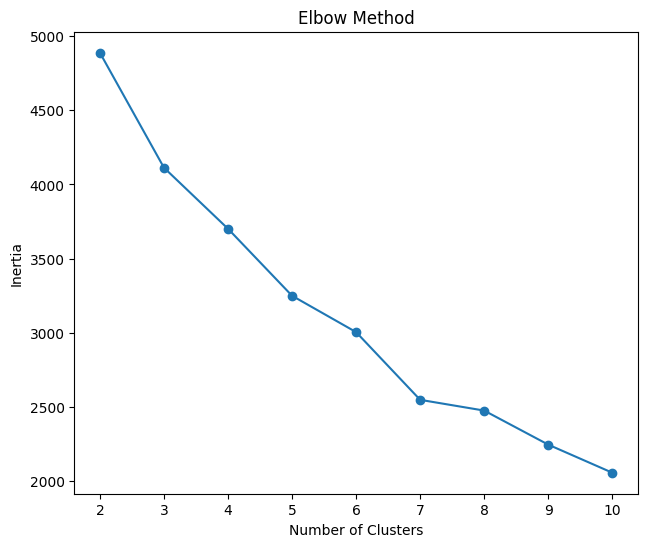

In [58]:
# Plotting the Elbow Curve
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Create optimal segmentation

In [59]:
# Applying KMeans
n_clusters = 4
kmeans = KMeans(n_init = 'auto', n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_df) + 1

In [60]:
df = docs.copy()

In [61]:
scaled_df = pd.DataFrame(scaled_df, columns = docs.columns)

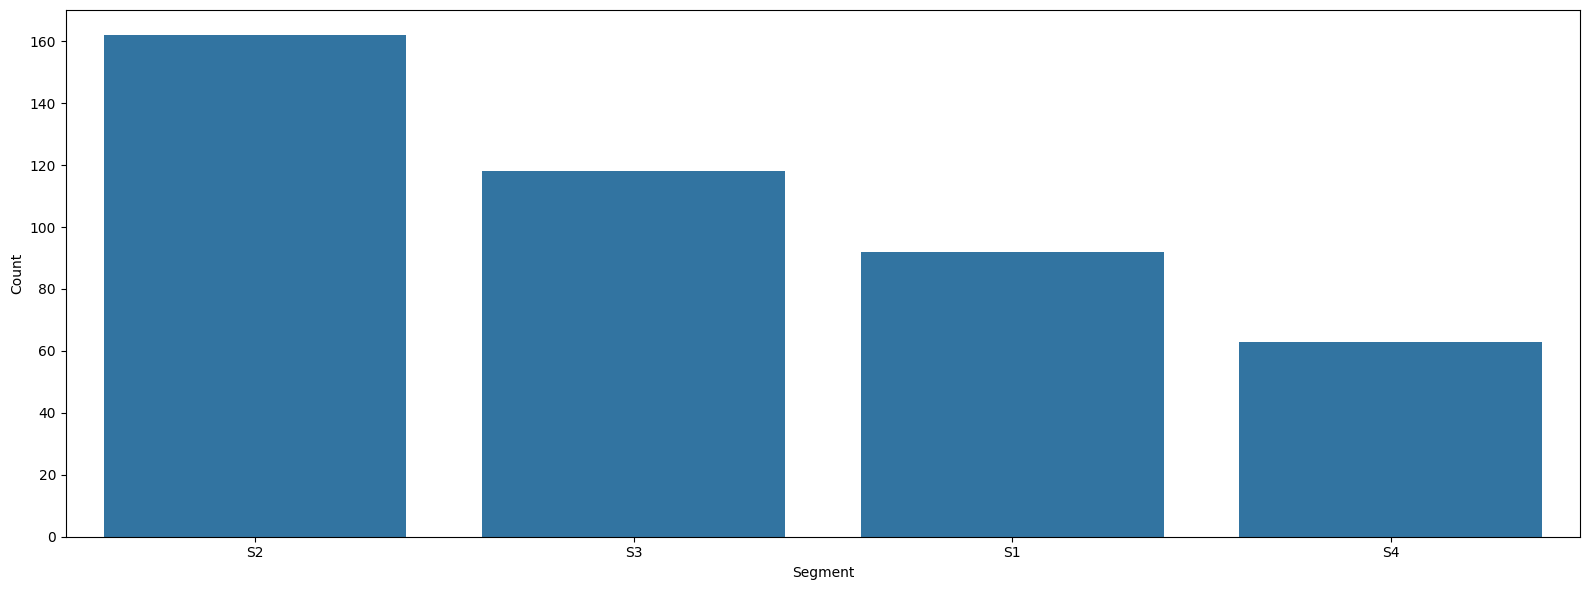

In [62]:
plt.figure(figsize = (16, 6))
df['Segment'] = clusters
df['Segment'] = df['Segment'].apply(lambda x: f'S{x}')
scaled_df['Segment'] = clusters
scaled_df['Segment'] = scaled_df['Segment'].apply(lambda x: f'S{x}')
val_count = df['Segment'].value_counts().reset_index()
val_count.columns = ['Segment', 'Count']
val_count.sort_values(by = "Count", ascending = False)
sns.barplot(data = val_count, x = 'Segment', y = 'Count')
plt.tight_layout()

# Q4. Identify which features impact the new segmentation strategy the most.

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Prepare features and target for the decision tree model
X = docs
y = clusters

In [66]:
# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(docs, clusters)

DecisionTreeClassifier(random_state=42)

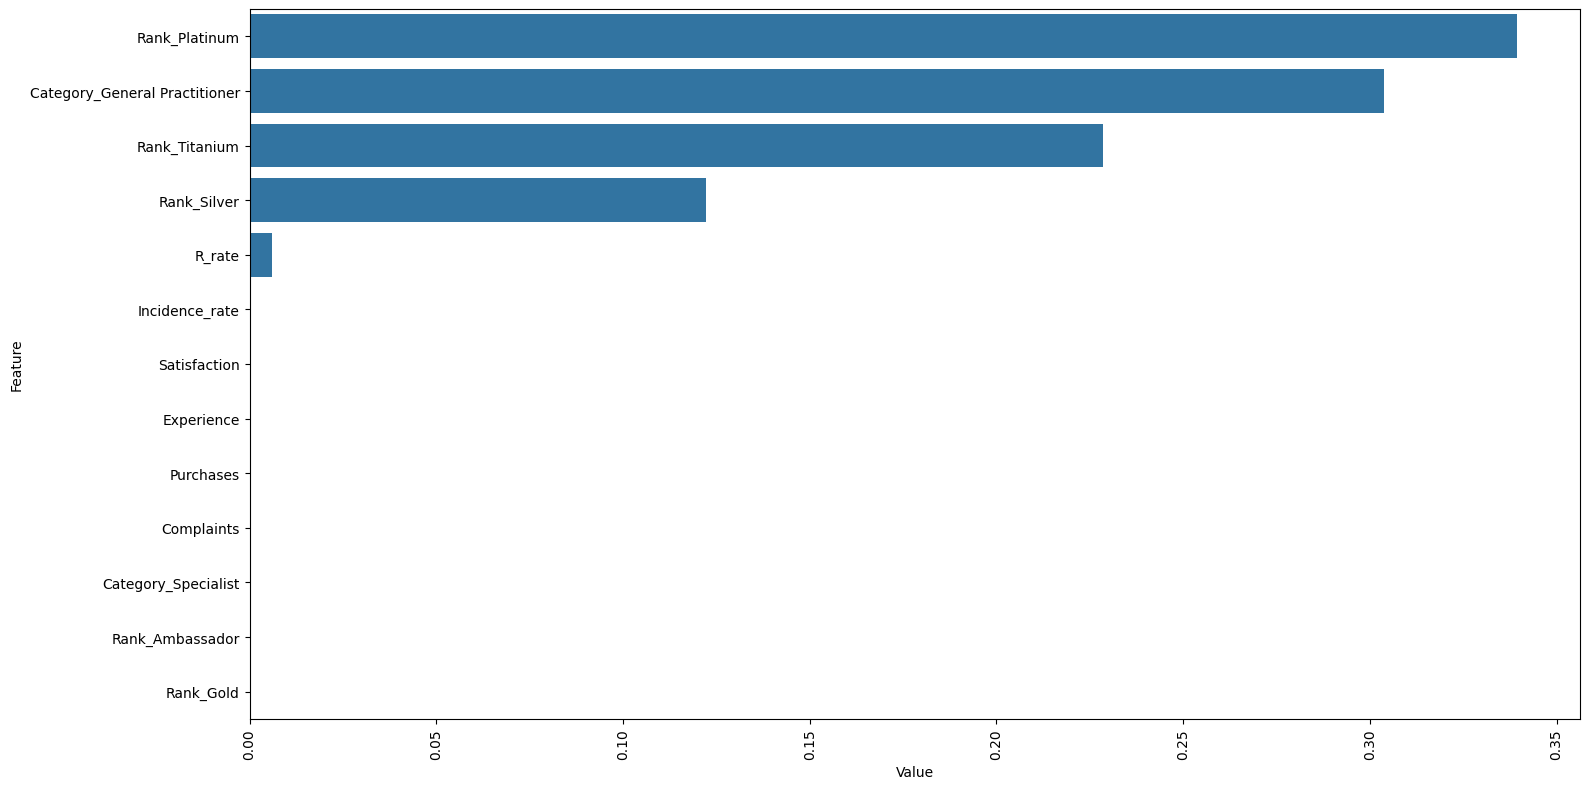

In [67]:
importances = {name: importance for name, importance in zip(X.columns, tree.feature_importances_)}
importances = sorted(importances.items(), key = lambda x: x[1], reverse = True)
importances = pd.DataFrame(importances)
importances.columns = ['Feature', 'Value']

plt.figure(figsize = (16, 8))
sns.barplot(data = importances, y = 'Feature', x = 'Value')
plt.xticks(rotation = 90)
plt.tight_layout()

# Q5. Your team will need to explain the new segments to the rest of the company. Describe which characteristics distinguish the newly defined segments.

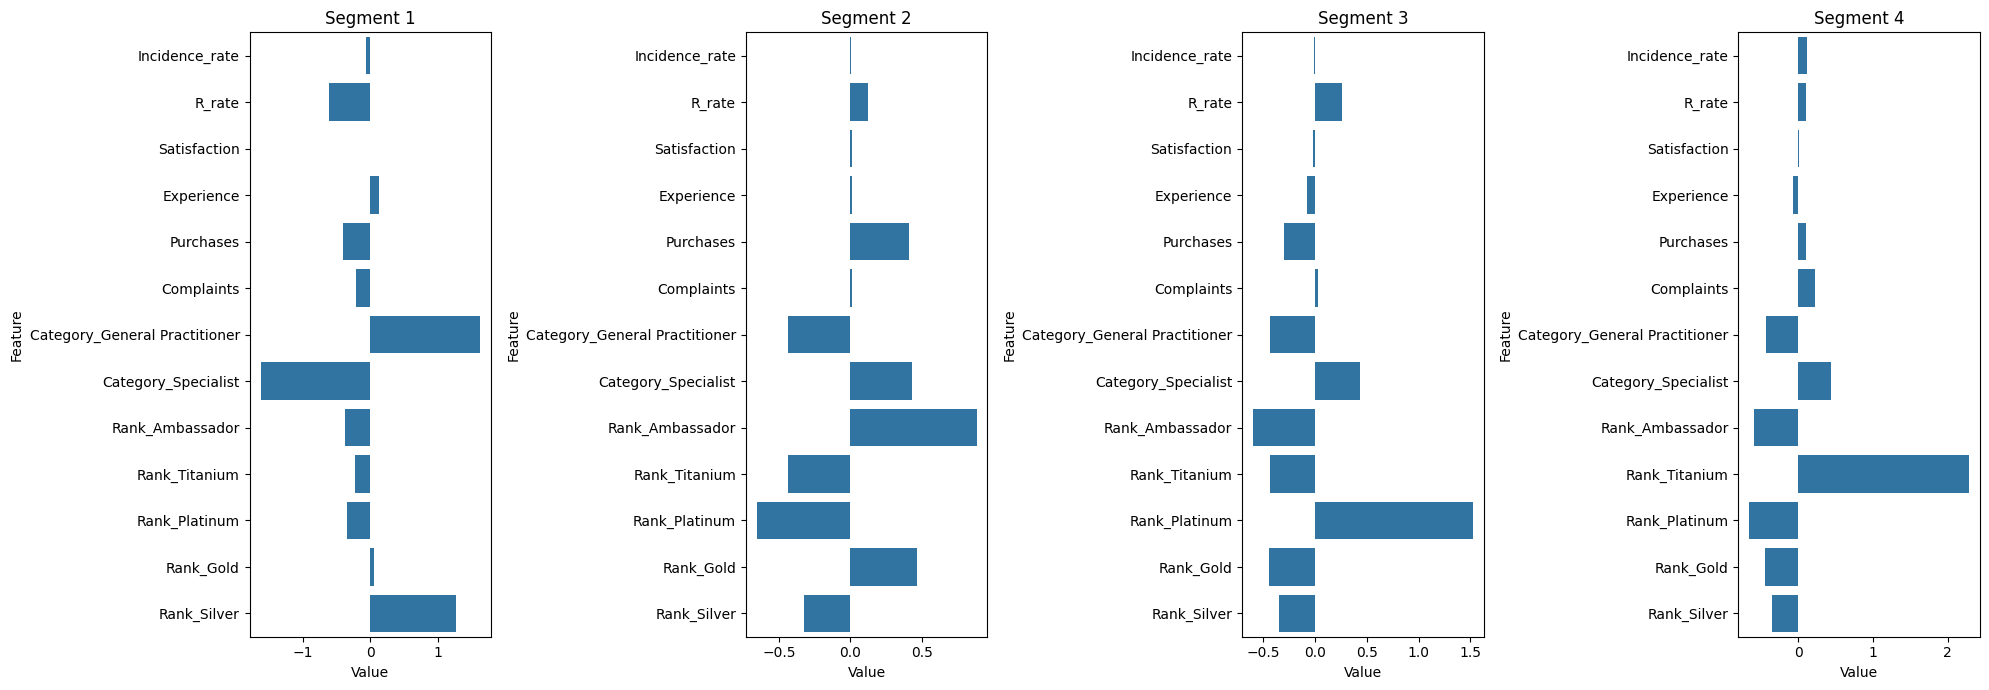

In [68]:
fig, ax = plt.subplots(1, n_clusters, figsize = (20,7))

for i in range(0, n_clusters):
    segment = f'S{i + 1}'
    seg = scaled_df[scaled_df['Segment'] == segment]
    seg = seg[[s for s in seg.columns if s != 'Segment']]
    seg = seg.mean().reset_index()
    seg.columns = ['Feature', 'Value']
    sns.barplot(data = seg, x = 'Value', y = 'Feature', ax=ax[i])
    ax[i].set_title(f'Segment {i + 1}')

plt.tight_layout()

In [69]:
mean_df = df.mean(numeric_only=True).reset_index()
mean_df.columns = ['Feature', 'Average']

In [70]:
cats = sorted(df.columns)
cats = cats[:-1]

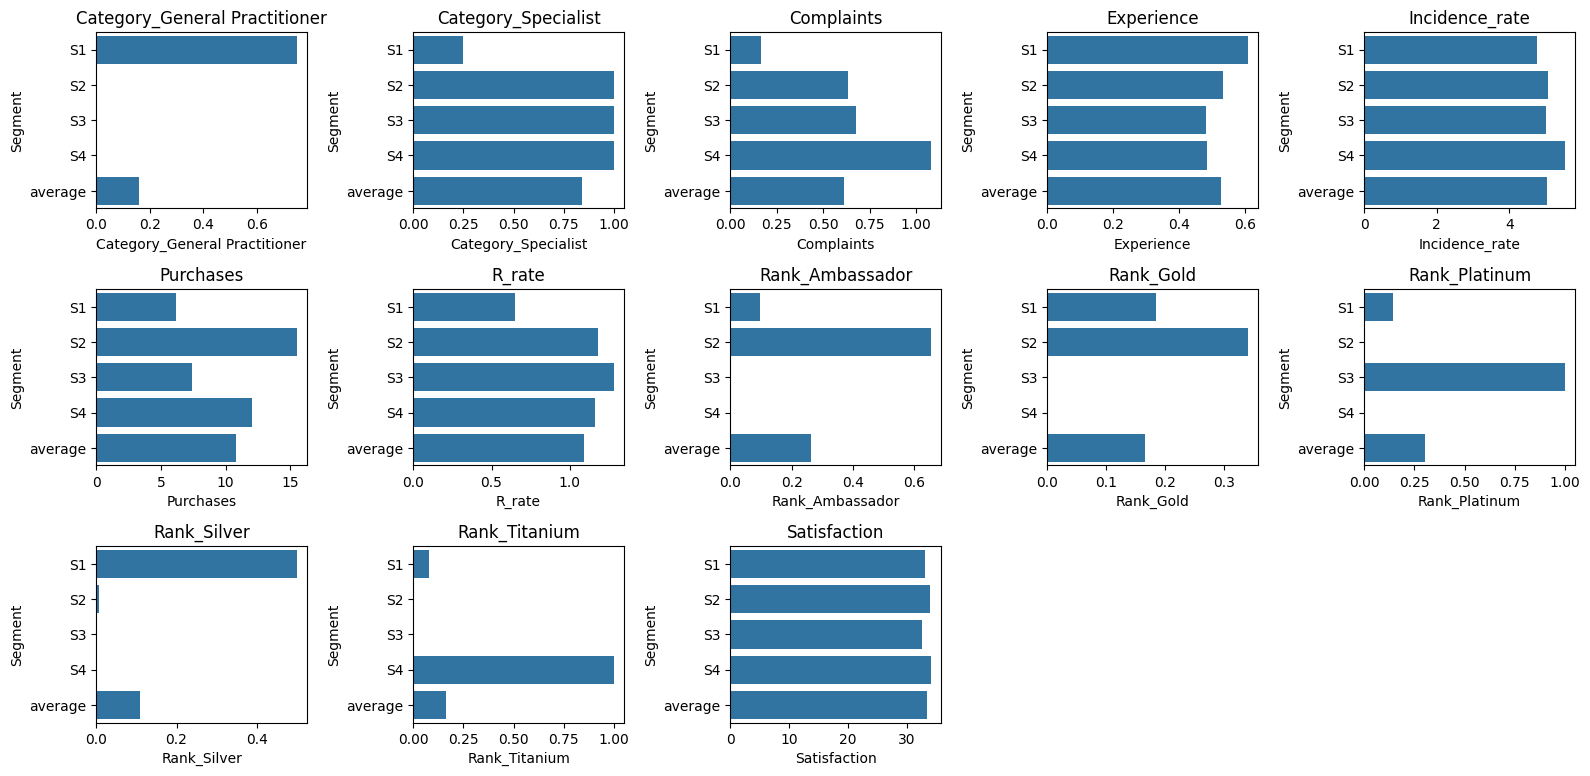

In [96]:
n_rows = 4
n_cols = 5

fig, ax = plt.subplots(n_rows, n_cols, figsize = (16, 10))
ax = ax.flatten()

for i in range(0, len(cats)):
    seg = df.groupby("Segment")[cats[i]].mean().reset_index()

    tmp = pd.DataFrame([{'Segment': 'average', f'{cats[i]}': mean_df[mean_df['Feature'] == f'{cats[i]}']['Average'].values[0]}])
    seg = pd.concat([seg, tmp])
    
    sns.barplot(data = seg, x = cats[i], y = 'Segment', ax = ax[i])
    ax[i].set_title(cats[i])

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax[j])

plt.tight_layout()

In [97]:
dataset = pd.DataFrame([{k:v for k, v in mean_df.values}])
dataset['Segment'] = 'average'
pd.concat([df.groupby('Segment').mean().reset_index(), dataset])

,Segment,Incidence_rate,R_rate,Satisfaction,Experience,Purchases,Complaints,Category_General Practitioner,Category_Specialist,Rank_Ambassador,Rank_Titanium,Rank_Platinum,Rank_Gold,Rank_Silver
0,S1,4.752609,0.650109,33.131413,0.608913,6.184783,0.163043,0.750000,0.250000,0.097826,0.076087,0.141304,0.184783,0.500000
1,S2,5.063210,1.181914,33.836296,0.533765,15.493827,0.635802,0.000000,1.000000,0.654321,0.000000,0.000000,0.339506,0.006173
2,S3,5.006949,1.282119,32.578390,0.482712,7.355932,0.677966,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,S4,5.530794,1.164921,34.036667,0.483968,12.031746,1.079365,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
0,average,5.049977,1.094161,33.375011,0.528598,10.816092,0.611494,0.158621,0.841379,0.264368,0.160920,0.301149,0.165517,0.108046
